In [68]:
# Importing libraries

import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import json
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn import svm
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [69]:
y_true = [3]
y_pred = [6]
mean_absolute_percentage_error(y_true, y_pred)

1.0

In [70]:
# Read dataset

df = pd.read_csv("C:/Users/sidda/Desktop/sm_projects_neue/SEM5_MPR/tmdb_5000_movies.csv")
df.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.438,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.000,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.200,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.083,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.900,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.377,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.000,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.300,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.313,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.600,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.927,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.100,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.700,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.000,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.900,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.682,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.400,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193

In [71]:
def plot_boxplot(col):
    # Visualize petal length distribution for all species
    fig, ax = plt.subplots(figsize=(3, 7))
    # Remove top and right border
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Remove y-axis tick marks
    ax.yaxis.set_ticks_position('none')
    # Add major gridlines in the y-axis
    ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
    # Set plot title
    ax.set_title(f'Distribution of {col}')
    # Set species names as labels for the boxplot
    # dataset = [df['vote_aver]]
    # labels = df['vote_average'].unique()
    ax.boxplot( df[col])
    # plt.ticklabel_format(style='plain', axis='y')

    plt.show()


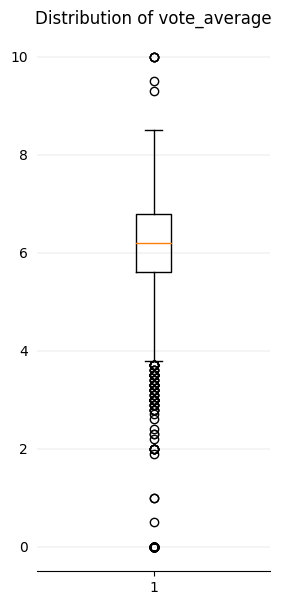

In [72]:
plot_boxplot('vote_average')

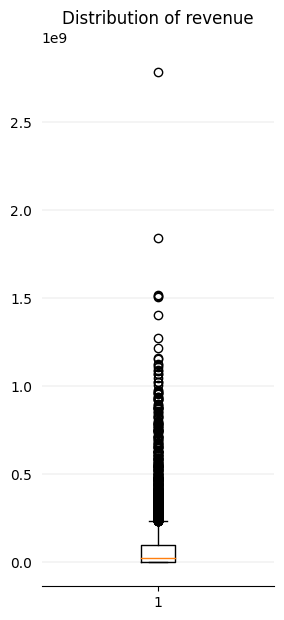

In [73]:
plot_boxplot('revenue')

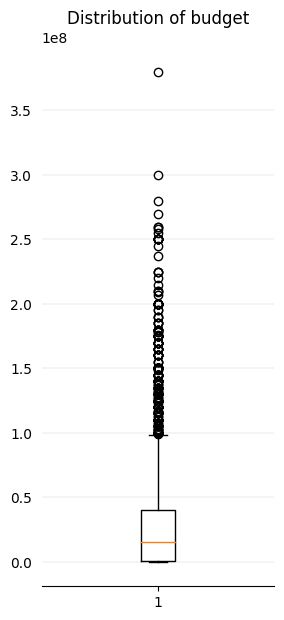

In [74]:
plot_boxplot('budget')

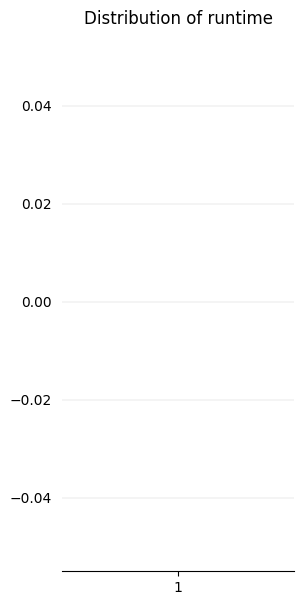

In [75]:
plot_boxplot('runtime')

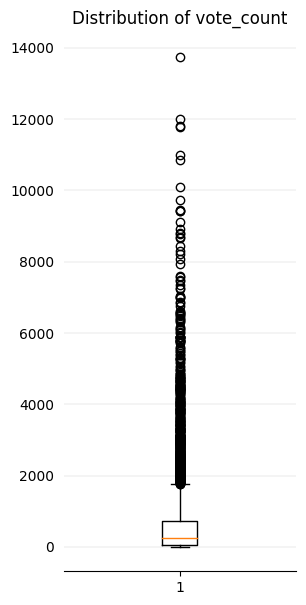

In [76]:
plot_boxplot('vote_count')

In [77]:
# Dropping columns that are not required
dropcols = ['homepage', 'id', 'original_title', 'overview', 'production_countries', 'spoken_languages', 'status', 'tagline', 'title']
print(df.shape)
df = df.drop(dropcols, axis=1)
print(df.shape)

# columns that might be partially useful once we transform them: genres, keywords, production_companies
# transformations required: release_date to d,m,y,day

(4803, 20)
(4803, 11)


In [78]:
df.isnull().sum()

budget                  0
genres                  0
keywords                0
original_language       0
popularity              0
production_companies    0
release_date            1
revenue                 0
runtime                 2
vote_average            0
vote_count              0
dtype: int64

In [79]:
df = df.dropna()
df.shape

(4800, 11)

In [80]:
len(df[df['budget'] == 100000])

5

<Axes: xlabel='runtime', ylabel='Count'>

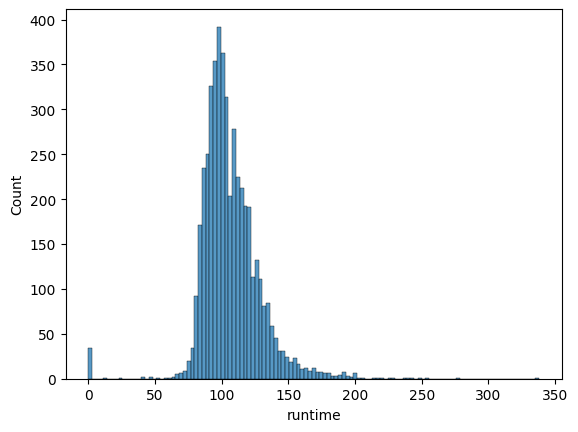

In [81]:
sns.histplot(df['runtime'])

In [82]:
df = df[df['revenue']>=10000]
df = df[df['vote_count']>=10]
df = df[df['runtime']>=60]
df = df[df['budget']>=1000]

df.shape



(3167, 11)

In [83]:
df['release_date'] = pd.to_datetime(df['release_date'])

df = df.sort_values(by='release_date')
df = df.set_index('release_date')
# Calculate the rolling sum of budgets for the last 22 days
df['rolling_budget_sum'] = df['budget'].rolling(window='22D', min_periods=1).sum()
# print(df.head(25))
# Calculate the movie impact by dividing the budget by the rolling sum
df['relative_budget_impact'] = df['budget'] / df['rolling_budget_sum']

# Drop the temporary rolling sum column if needed
df.drop(columns=['rolling_budget_sum'], inplace=True)
df = df.reset_index()

In [84]:
df['release_date'] = pd.to_datetime(df['release_date'])
# df['date'] = df['release_date'].dt.day.astype(int)
df['month'] = df['release_date'].dt.month.astype(int)
df['year'] = df['release_date'].dt.year.astype(int)
df['day'] = df['release_date'].dt.weekday.astype(int)

df = df.drop(['release_date', 'vote_count'], axis=1)

In [85]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df['decade'] = (df['year'] // 10) * 10

# Group by decade and calculate the average revenue
average_revenue_by_decade = df.groupby('decade')['revenue'].mean()

# Print the average revenue for each decade
print(average_revenue_by_decade)

decade
1910     8394751.000
1920     9002807.333
1930    59891728.455
1940    35136985.875
1950    15489256.875
1960    37959119.500
1970    80360693.963
1980    82888495.050
1990   115399984.555
2000   118283826.355
2010   158740362.657
Name: revenue, dtype: float64


In [86]:
df = df[df['year']>=1970]

In [87]:
# import requests
# import pandas as pd

# # Define the API endpoint
# api_url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"

# # Define the CPI series ID (Consumer Price Index for All Urban Consumers: All Items)
# cpi_series_id = "CUUR0000SA0"

# cpi_df_final = pd.DataFrame()
# # Define the start and end years for which you want CPI data
# start_year = 1910
# end_year = 1920

# while end_year < 2030:
#     # Prepare the request parameters
#     data = {
#         "seriesid": ["CUUR0000SA0"],
#         "startyear": str(start_year),
#         "endyear": str(end_year),
#         "registrationkey": "c4303d9f0fc4416f8ce4b5a8edc06215"  # Replace with your BLS API key
#     }
#     headers = {'Content-type': 'application/json'}
    
#     # Make the API request
#     response = requests.post(api_url, json=data, headers=headers)
#     data = response.json()
#     # print(data)
    
#     # Extract CPI data from the response
#     cpi_data = data['Results']['series'][0]['data']
    
#     # Create a DataFrame from the CPI data
#     cpi_df = pd.DataFrame(cpi_data)
#     cpi_df['cpi_year'] = pd.to_numeric(cpi_df['year'])
#     cpi_df['value'] = pd.to_numeric(cpi_df['value'])
#     cpi_df = cpi_df.sort_values(by='year')
#     cpi_df = cpi_df[['cpi_year', 'value']]

#     cpi_df_final = pd.concat([cpi_df_final, cpi_df], ignore_index=True)

#     start_year += 10
#     end_year += 10
    

# # Print the CPI DataFrame
# cpi_df_final = cpi_df_final.groupby('cpi_year').mean().reset_index()
# print(cpi_df_final)
# cpi_df_final.to_csv('cpi_df_final.csv')

cpi_df_final = pd.read_csv('C:/Users/sidda/Desktop/sm_projects_neue/SEM5_MPR/cpi_df_final.csv')


In [88]:
cpi_df = cpi_df_final
cpi_df['cpi_year'].values

array([1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [89]:
df.isnull().sum()

budget                    0
genres                    0
keywords                  0
original_language         0
popularity                0
production_companies      0
revenue                   0
runtime                   0
vote_average              0
relative_budget_impact    0
month                     0
year                      0
day                       0
decade                    0
dtype: int64

In [90]:
df.describe()

,budget,popularity,revenue,runtime,vote_average,relative_budget_impact,month,year,day,decade
count,3054.000,3054.000,3054.000,3054.000,3054.000,3054.000,3054.000,3054.000,3054.000,3054.000
mean,42673823.521,29.932,126873129.779,110.227,6.293,0.198,6.951,2003.556,3.147,1999.240
std,44765725.313,36.721,189669973.478,19.922,0.841,0.238,3.357,9.342,1.318,9.857
min,7000.000,0.034,10000.000,63.000,2.300,0.000,1.000,1970.000,0.000,1970.000
25%,12500000.000,11.247,19518097.750,96.000,5.800,0.048,4.000,1999.000,2.000,1990.000
50%,28000000.000,21.211,60403211.500,107.000,6.300,0.114,7.000,2005.000,3.000,2000.000
75%,58000000.000,38.051,152818905.500,120.000,6.900,0.245,10.000,2011.000,4.000,2010.000
max,380000000.000,875.581,2787965087.000,338.000,8.500,1.000,12.000,2016.000,6.000,2010.000


In [91]:
cpi_df['value'].iloc[-1]

258.8111666666667

In [92]:
merged_df = df.merge(cpi_df, left_on='year', right_on='cpi_year')
merged_df.to_csv('merged_df0.csv')

# Calculate CPI ratio and inflation-adjusted revenue
# merged_df['cpi_ratio'] = cpi_df['value'] / merged_df['value']
merged_df['cpi_ratio'] = cpi_df['value'].iloc[-1] / merged_df['value']

merged_df['inflation_adjusted_revenue'] = merged_df['revenue'] * merged_df['cpi_ratio']
merged_df['inflation_adjusted_budget'] = merged_df['budget'] * merged_df['cpi_ratio']

merged_df = merged_df.drop(['decade', 'cpi_year', 'value', 'cpi_ratio',], axis=1)
yy = merged_df[['year', 'revenue', 'inflation_adjusted_revenue']]
yy['ratio'] = merged_df['inflation_adjusted_revenue'] / merged_df['revenue']
print(yy)
merged_df['revenue'] = merged_df['inflation_adjusted_revenue']
merged_df['budget'] = merged_df['inflation_adjusted_budget']
df = merged_df

# Print the adjusted DataFrame
# print(merged_df)

      year    revenue  inflation_adjusted_revenue  ratio
0     1970   89800000               598615396.437  6.666
1     1970   29548291               196971736.425  6.666
2     1970    2200000                14665410.603  6.666
3     1970   34505110               230014366.389  6.666
4     1970   18999718               126653939.006  6.666
...    ...        ...                         ...    ...
3049  2016   77000000                83032769.855  1.078
3050  2016  745000000               803369007.037  1.078
3051  2016  143695338               154953531.550  1.078
3052  2016   94061311               101430794.656  1.078
3053  2016   15861566                17104282.587  1.078

[3054 rows x 4 columns]


C:\Users\sidda\AppData\Local\Temp\ipykernel_17776\265460121.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yy['ratio'] = merged_df['inflation_adjusted_revenue'] / merged_df['revenue']


In [93]:
merged_df['inflation_adjusted_revenue']

0      598615396.437
1      196971736.425
2       14665410.603
3      230014366.389
4      126653939.006
            ...     
3049    83032769.855
3050   803369007.037
3051   154953531.550
3052   101430794.656
3053    17104282.587
Name: inflation_adjusted_revenue, Length: 3054, dtype: float64

In [94]:
merged_df.to_csv('merged_df.csv')

In [95]:
# merged_df = df.merge(cpi_df, left_on='year', right_on='cpi_year', how='left')

# # Calculate CPI ratio and inflation-adjusted revenue
# merged_df['cpi_ratio'] = cpi_df['value'] / merged_df['value']
# merged_df['inflation_adjusted_revenue'] = merged_df['revenue'] * merged_df['cpi_ratio']

# # Print the adjusted DataFrame
# print(merged_df['inflation_adjusted_revenue'].values[:10])

# # merged_df = merged_df.drop(['decade', 'cpi_year', 'value', 'cpi_ratio'], axis=1)
# df = merged_df

In [96]:
df.head(2)

,budget,genres,keywords,original_language,popularity,production_companies,revenue,runtime,vote_average,relative_budget_impact,month,year,day,Unnamed: 0,inflation_adjusted_revenue,inflation_adjusted_budget
0,79993148.744,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...","[{""id"": 1402, ""name"": ""general""}, {""id"": 1956,...",en,21.934,"[{""name"": ""Twentieth Century Fox Film Corporat...",598615396.437,172.000,7.300,1.000,1,1970,6,57,598615396.437,79993148.744
1,169885449.646,"[{""id"": 36, ""name"": ""History""}, {""id"": 28, ""na...","[{""id"": 233, ""name"": ""japan""}, {""id"": 1956, ""n...",en,9.796,"[{""name"": ""Twentieth Century Fox Film Corporat...",196971736.425,144.000,6.900,0.680,1,1970,0,57,196971736.425,169885449.646


In [97]:
df.shape

(3054, 16)

In [98]:
df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'popularity',
       'production_companies', 'revenue', 'runtime', 'vote_average',
       'relative_budget_impact', 'month', 'year', 'day', 'Unnamed: 0',
       'inflation_adjusted_revenue', 'inflation_adjusted_budget'],
      dtype='object')

In [99]:
df.describe()

,budget,popularity,revenue,runtime,vote_average,relative_budget_impact,month,year,day,Unnamed: 0,inflation_adjusted_revenue,inflation_adjusted_budget
count,3054.000,3054.000,3054.000,3054.000,3054.000,3054.000,3054.000,3054.000,3054.000,3054.000,3054.000,3054.000
mean,57672946.592,29.932,179030899.240,110.227,6.293,0.198,6.951,2003.556,3.147,90.556,179030899.240,57672946.592
std,55779412.546,36.721,266642400.450,19.922,0.841,0.238,3.357,9.342,1.318,9.342,266642400.450,55779412.546
min,9204.663,0.034,12063.708,63.000,2.300,0.000,1.000,1970.000,0.000,57.000,12063.708,9204.663
25%,18031223.511,11.247,28509001.697,96.000,5.800,0.048,4.000,1999.000,2.000,86.000,28509001.697,18031223.511
50%,39692934.922,21.211,86618334.723,107.000,6.300,0.114,7.000,2005.000,3.000,92.000,86618334.723,39692934.922
75%,80618160.108,38.051,213427115.584,120.000,6.900,0.245,10.000,2011.000,4.000,98.000,213427115.584,80618160.108
max,437221515.447,875.581,3363319598.915,338.000,8.500,1.000,12.000,2016.000,6.000,103.000,3363319598.915,437221515.447


In [100]:
df = df.drop(['inflation_adjusted_revenue', 'inflation_adjusted_budget'], axis=1)

In [101]:
df.isnull().sum()

budget                    0
genres                    0
keywords                  0
original_language         0
popularity                0
production_companies      0
revenue                   0
runtime                   0
vote_average              0
relative_budget_impact    0
month                     0
year                      0
day                       0
Unnamed: 0                0
dtype: int64

<Axes: ylabel='Frequency'>

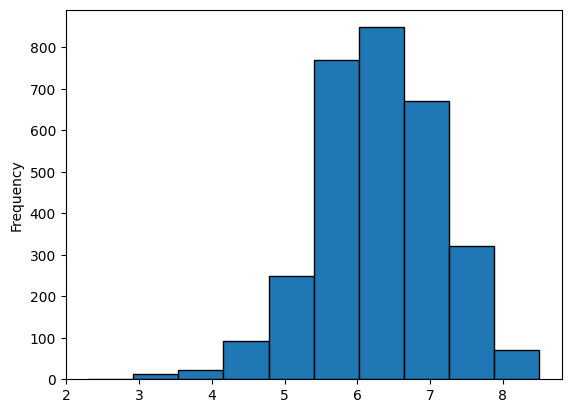

In [102]:
# df['vote_average'].plot(kind='kde')
df['vote_average'].plot(kind='hist', edgecolor='black')

<Axes: xlabel='vote_average', ylabel='Count'>

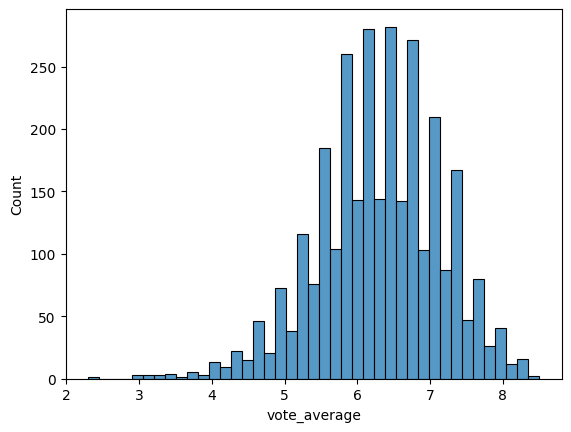

In [103]:
sns.histplot(df['vote_average'])

In [104]:
def tmdb_json_convert(x):
    names = []
    for data in json.loads(x):
        names.append(data['name'])
    return names

object


In [105]:
df['genres'] = df['genres'].apply(tmdb_json_convert)
df['keywords'] = df['keywords'].apply(tmdb_json_convert)
df['production_companies'] = df['production_companies'].apply(tmdb_json_convert)
df.head(10)

object


In [106]:
genre_count = {}
keywords_count = {}
production_companies_count = {}
language_count = {}

def count_occurence(x, value_count):
    for i in x:
        value_count[i] = value_count.get(i, 0) + 1

df['genres'].apply(lambda x: count_occurence(x, genre_count))
df['keywords'].apply(lambda x: count_occurence(x, keywords_count))
df['production_companies'].apply(lambda x: count_occurence(x, production_companies_count))
df['original_language'].apply(lambda x: count_occurence([x], language_count))

print(len(genre_count))
print(len(keywords_count))
print(len(production_companies_count))
print(len(language_count))

18
8400
3429
25


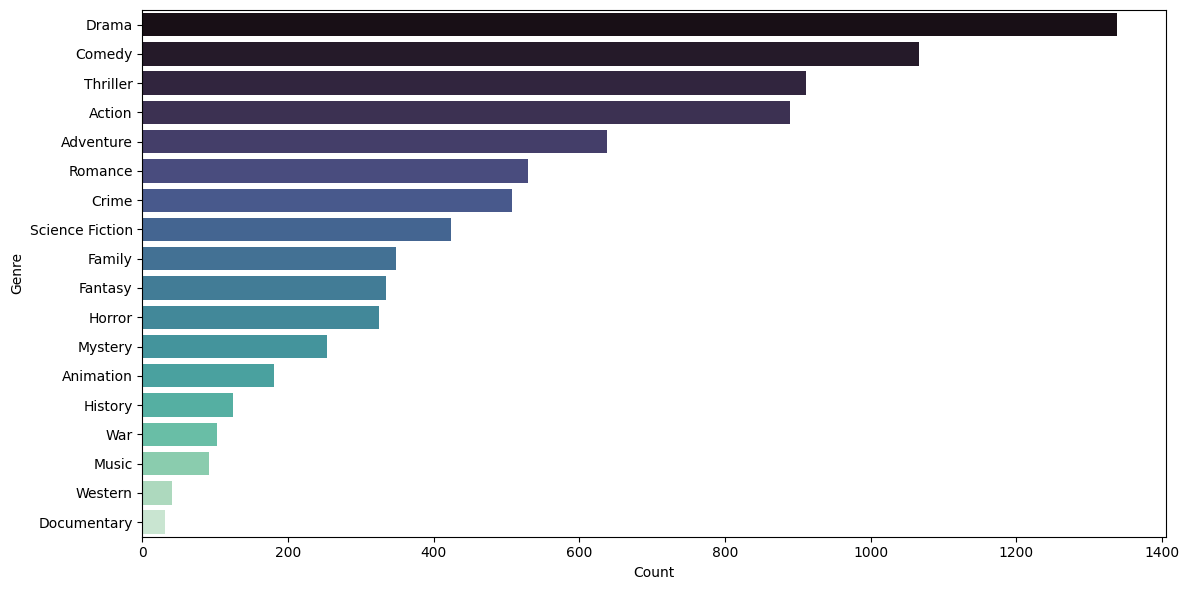

In [107]:
genre_df = pd.DataFrame({"Genre":genre_count.keys(),"Count":genre_count.values()})
genre_df = genre_df.sort_values(by=['Count'], ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(y=genre_df["Genre"],x=genre_df["Count"],palette="mako")
plt.xlabel("Count")
plt.tight_layout()

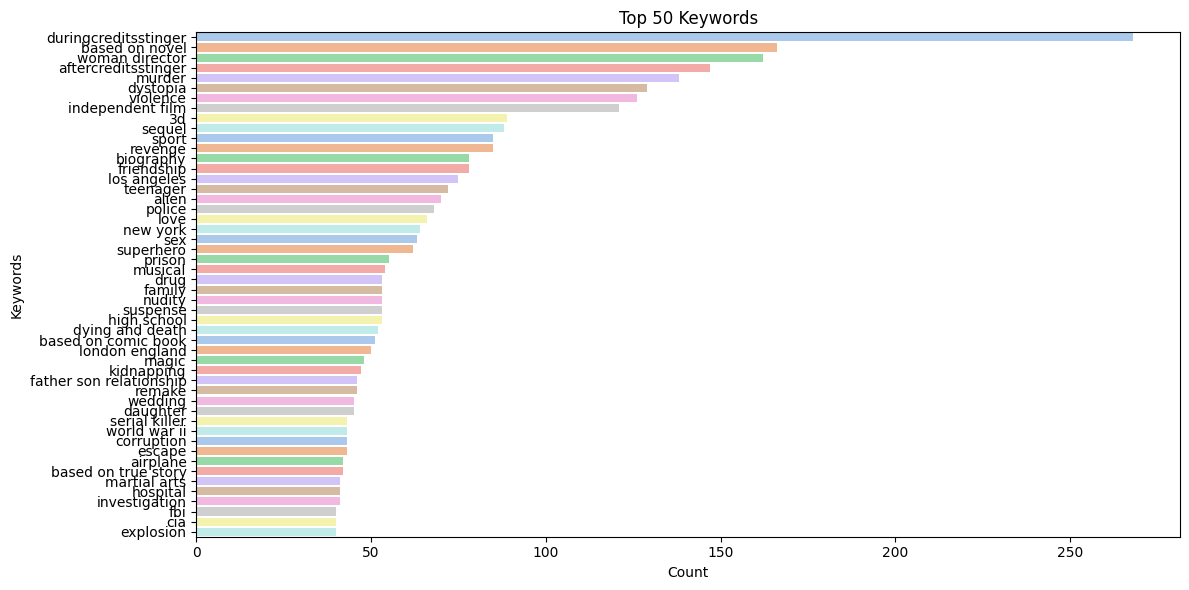

In [108]:
keywords_df = pd.DataFrame({"Keywords":keywords_count.keys(),"Count":keywords_count.values()})
keywords_df = keywords_df.sort_values(by=['Count'], ascending=False)

limit = 50
keywords_df = keywords_df[:limit]
plt.figure(figsize=(12,6))
sns.barplot(y = keywords_df["Keywords"],x = keywords_df["Count"],palette="pastel")
plt.title("Top "+ str(limit) + " Keywords")
plt.xlabel("Count")
plt.tight_layout()

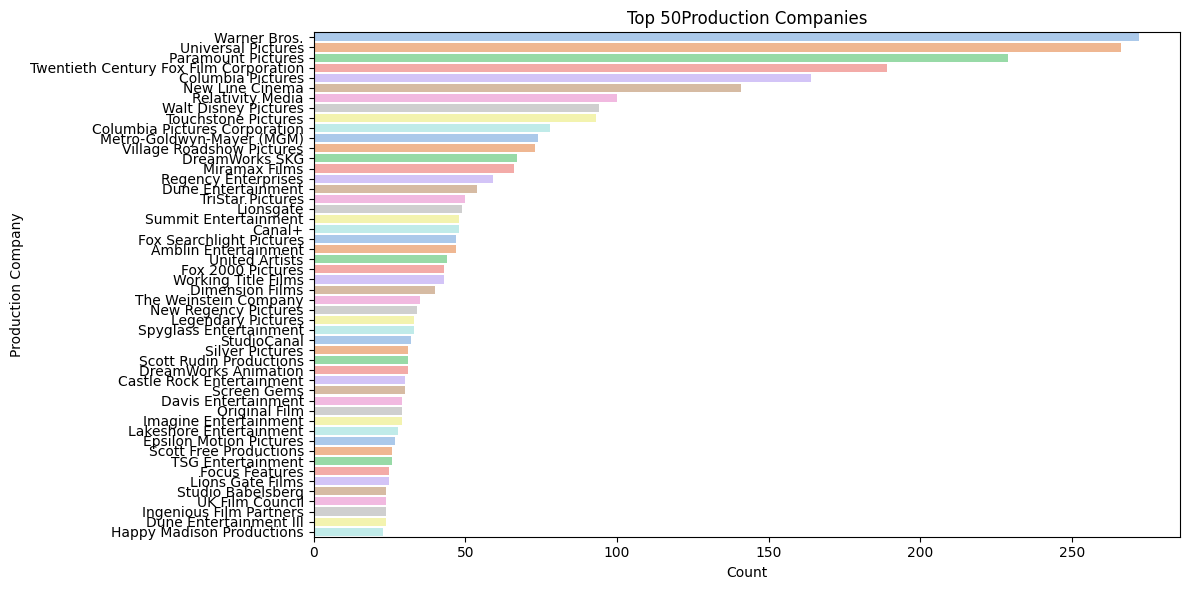

In [109]:
production_companies_count = pd.DataFrame({"Production Company":production_companies_count.keys(),"Count":production_companies_count.values()})
production_companies_count = production_companies_count.sort_values(by=['Count'], ascending=False)

limit = 50
production_companies_count = production_companies_count[:limit]
plt.figure(figsize=(12,6))
sns.barplot(y = production_companies_count["Production Company"],x = production_companies_count["Count"],palette="pastel")
plt.title("Top "+ str(limit) + "Production Companies")
plt.xlabel("Count")
plt.tight_layout()

In [110]:
df.head(5)

,budget,genres,keywords,original_language,popularity,production_companies,revenue,runtime,vote_average,relative_budget_impact,month,year,day,Unnamed: 0
0,79993148.744,"[Drama, History, War]","[general, world war ii, normandy, biography, h...",en,21.934,[Twentieth Century Fox Film Corporation],598615396.437,172.000,7.300,1.000,1,1970,6,57
1,169885449.646,"[History, Action, Drama, Adventure, War]","[japan, world war ii, pearl harbor, soldier, i...",en,9.796,[Twentieth Century Fox Film Corporation],196971736.425,144.000,6.900,0.680,1,1970,0,57
2,73327053.016,"[Drama, History]","[pennsylvania, miner, coal mining, coal mine, ...",en,1.397,"[Paramount Pictures, Tamm Productions]",14665410.603,124.000,5.900,0.227,1,1970,1,57
3,3999657.437,"[History, Documentary, Music]","[hippie, free love, musical, music, woodstock,...",en,3.410,"[Wadleigh-Maurice, Warner Bros.]",230014366.389,225.000,7.100,1.000,3,1970,3,57
4,19998287.186,"[Adventure, Science Fiction, Mystery]","[mutant, dystopia, survivor, astronaut, ape, s...",en,24.393,"[Twentieth Century Fox Film Corporation, APJAC...",126653939.006,95.000,6.200,1.000,5,1970,4,57


In [111]:
for genre in genre_df['Genre'][:15]:
    df[f'is {genre}'] = df['genres'].apply(lambda x: 1 if genre in x else 0)

df = df.drop('genres', axis=1)

In [112]:
# df['revenue']

In [113]:
for production_company in production_companies_count["Production Company"][:30]:
    df[f'is {production_company}'] = df['production_companies'].apply(lambda x: 1 if production_company in x else 0)

# for keyword in keywords_df["Keywords"][:20]:
#     df[f'is {keyword}'] = df['keywords'].apply(lambda x: 1 if keyword in x else 0)

In [114]:
df = df.drop(['keywords', 'production_companies'], axis=1)
df.columns

Index(['budget', 'original_language', 'popularity', 'revenue', 'runtime',
       'vote_average', 'relative_budget_impact', 'month', 'year', 'day',
       'Unnamed: 0', 'is Drama', 'is Comedy', 'is Thriller', 'is Action',
       'is Adventure', 'is Romance', 'is Crime', 'is Science Fiction',
       'is Family', 'is Fantasy', 'is Horror', 'is Mystery', 'is Animation',
       'is History', 'is War', 'is Warner Bros.', 'is Universal Pictures',
       'is Paramount Pictures', 'is Twentieth Century Fox Film Corporation',
       'is Columbia Pictures', 'is New Line Cinema', 'is Relativity Media',
       'is Walt Disney Pictures', 'is Touchstone Pictures',
       'is Columbia Pictures Corporation', 'is Metro-Goldwyn-Mayer (MGM)',
       'is Village Roadshow Pictures', 'is DreamWorks SKG', 'is Miramax Films',
       'is Regency Enterprises', 'is Dune Entertainment',
       'is TriStar Pictures', 'is Lionsgate', 'is Summit Entertainment',
       'is Canal+', 'is Fox Searchlight Pictures', 'is Am

In [115]:
df['original_language'].unique()

array(['en', 'de', 'xx', 'fr', 'ja', 'es', 'cn', 'fa', 'pt', 'zh', 'ko',
       'ru', 'hi', 'da', 'th', 'af', 'nl', 'ro', 'he', 'no', 'it', 'nb',
       'id', 'pl', 'te'], dtype=object)

In [116]:
language_count

{'en': 2937,
 'de': 8,
 'xx': 1,
 'fr': 25,
 'ja': 12,
 'es': 15,
 'cn': 5,
 'fa': 1,
 'pt': 2,
 'zh': 12,
 'ko': 5,
 'ru': 6,
 'hi': 6,
 'da': 4,
 'th': 2,
 'af': 1,
 'nl': 2,
 'ro': 1,
 'he': 1,
 'no': 1,
 'it': 2,
 'nb': 1,
 'id': 2,
 'pl': 1,
 'te': 1}

In [117]:
# df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
# df = df.drop('original_language', axis=1)

label_encoder = preprocessing.LabelEncoder()
df['original_language']= label_encoder.fit_transform(df['original_language'])

In [118]:
df

,budget,original_language,popularity,revenue,runtime,vote_average,relative_budget_impact,month,year,day,...,is Fox Searchlight Pictures,is Amblin Entertainment,is United Artists,is Fox 2000 Pictures,is Working Title Films,is Dimension Films,is The Weinstein Company,is New Regency Pictures,is Legendary Pictures,is Spyglass Entertainment
0,79993148.744,4,21.934,598615396.437,172.000,7.300,1.000,1,1970,6,...,0,0,0,0,0,0,0,0,0,0
1,169885449.646,4,9.796,196971736.425,144.000,6.900,0.680,1,1970,0,...,0,0,0,0,0,0,0,0,0,0
2,73327053.016,4,1.397,14665410.603,124.000,5.900,0.227,1,1970,1,...,0,0,0,0,0,0,0,0,0,0
3,3999657.437,4,3.410,230014366.389,225.000,7.100,1.000,3,1970,3,...,0,0,0,0,0,0,0,0,0,0
4,19998287.186,4,24.393,126653939.006,95.000,6.200,1.000,5,1970,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3049,16175214.907,12,9.477,83032769.855,120.000,6.500,0.041,7,2016,4,...,0,0,0,0,0,0,0,0,0,0
3050,188710840.579,4,90.238,803369007.037,123.000,5.900,0.334,8,2016,1,...,0,0,0,0,0,0,0,0,0,0
3051,70092597.929,4,31.974,154953531.550,102.000,6.200,0.155,8,2016,2,...,0,0,0,0,0,0,0,0,0,0
3052,107834766.045,4,29.608,101430794.656,125.000,5.300,0.194,8,2016,2,...,0,0,0,0,0,0,0,0,0,0


In [119]:
X_scaler = RobustScaler()
y_scaler = RobustScaler()

y = df[['revenue', 'vote_average']]#dependent variable
X = df
X = X.drop(['revenue', 'vote_average'], axis=1)

X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

print(X.shape, y.shape)

(3054, 54) (3054, 2)


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, shuffle=True)

In [121]:
# model = svm.SVR(kernel='rbf')
# model.fit(X_train, [i[0] for i in y_train])
# y_pred = model.predict(X_test)

# y_pred = [[i,0] for i in y_pred]

# y_pred = y_scaler.inverse_transform(y_pred)
# y_test = y_scaler.inverse_transform(y_test)

# print("MAPE of revenue: ", mean_absolute_percentage_error([i[0] for i in y_test], [i[0] for i in y_pred]))
# print("MAPE of vote average: ", mean_absolute_percentage_error( [i[1] for i in y_test], [i[1] for i in y_pred]))

In [122]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=2000, max_depth=30, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, n_estimators=2000, random_state=0)

In [123]:
y_pred = regr.predict(X_test)

In [124]:
y_pred

array([[-0.1273098 , -0.77996888],
       [-0.13381581, -0.71286364],
       [ 3.05686491,  0.122     ],
       ...,
       [ 0.22522884,  0.19336364],
       [-0.07697449,  0.449     ],
       [ 2.83862077,  0.32172727]])

In [125]:
y_test

array([[ 0.50200778, -1.27272727],
       [-0.34499229, -1.81818182],
       [ 3.47327606,  0.27272727],
       ...,
       [-0.03310264,  0.54545455],
       [-0.19781062,  0.09090909],
       [ 4.01488277, -0.45454545]])

In [126]:
y_pred = y_scaler.inverse_transform(y_pred)
y_test = y_scaler.inverse_transform(y_test)

In [127]:
print("MAPE of revenue: ", mean_absolute_percentage_error([i[0] for i in y_test], [i[0] for i in y_pred]))
print("MAPE of vote average: ", mean_absolute_percentage_error( [i[1] for i in y_test], [i[1] for i in y_pred]))

MAPE of revenue:  4.096454335040948
MAPE of vote average:  0.07887300524773809


In [128]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred)
# y_test = y_scaler.inverse_transform(y_test)

print("MAPE of revenue: ", mean_absolute_percentage_error([i[0] for i in y_test], [i[0] for i in y_pred]))
print("MAPE of vote average: ", mean_absolute_percentage_error( [i[1] for i in y_test], [i[1] for i in y_pred]))

MAPE of revenue:  6.761468037054388
MAPE of vote average:  0.08491233125946553


In [129]:
model = svm.SVR(kernel='rbf')
model.fit(X_train, [i[0] for i in y_train])
y_pred = model.predict(X_test)

y_pred = [[i,0] for i in y_pred]

y_pred = y_scaler.inverse_transform(y_pred)
# y_test = y_scaler.inverse_transform(y_test)

print("MAPE of revenue: ", mean_absolute_percentage_error([i[0] for i in y_test], [i[0] for i in y_pred]))
print("MAPE of vote average: ", mean_absolute_percentage_error( [i[1] for i in y_test], [i[1] for i in y_pred]))

MAPE of revenue:  3.0236449129614074
MAPE of vote average:  0.1123606731969717
